# **Credit Card Fraud Detection - ML**

The goal of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions using historical data. By analyzing transaction patterns, the model should be able to distinguish between normal and fraudulent activity, helping financial institutions flag suspicious behavior early and reduce potential risks.

Challenges include:

1. Handling imbalanced datasets where fraud cases are a small fraction of total transactions.

2. Ensuring high precision to minimize false positives (flagging a valid transaction as fraud).

3. Ensuring high recall to detect as many fraud cases as possible.


**Step 1: Importing necessary Libraries**

We begin by importing the necessary Python libraries: numpy, pandas, matplotlib and seaborn for data handling, visualization and model building.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

**Step 2: Loading the Data**

Load the dataset into a pandas DataFrame and examine its structure. You can download the dataset from here. The dataset contains 284,807 transactions with 31 features including:


*   **Time**: This shows how many seconds have passed since the first transaction in the dataset.
*   **V1-V28**: These are special features created to hide sensitive information about the original data.
*   **Amount**: Transaction amount.
*   **Class**: Target variable (0 for normal transactions, 1 for fraudulent transactions).







In [ ]:
data = pd.read_csv("creditcard.csv")
print(data.head())

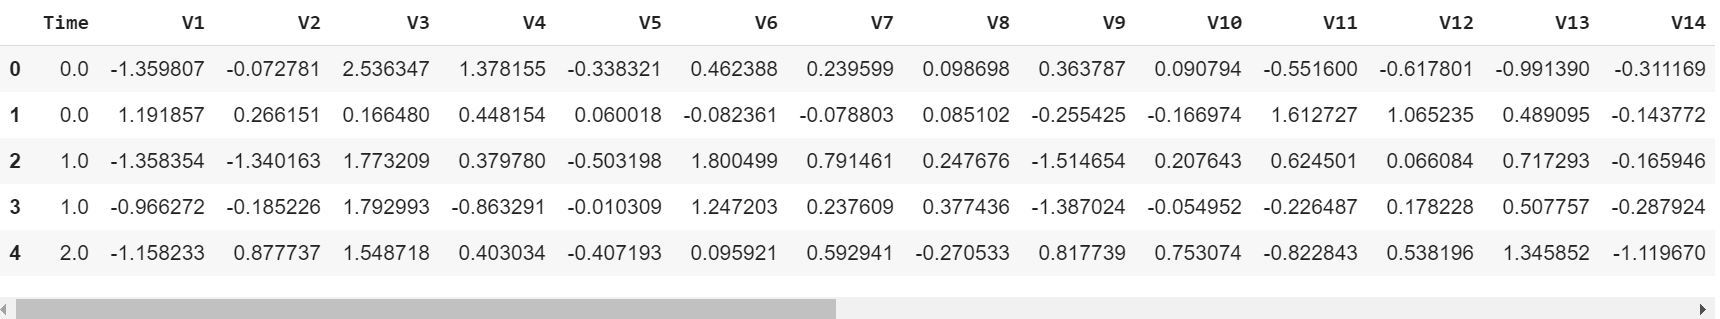

Now, let's explore more about the dataset using df.describe() method.

In [ ]:
print(data.describe())

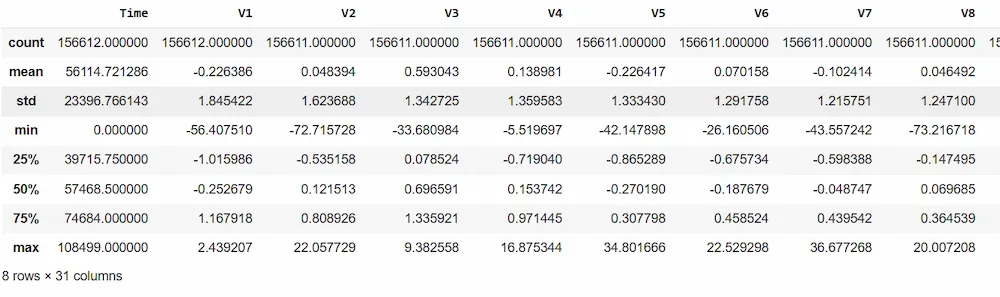

**Step 3: Analyzing Class Distribution**


The next step is to check the distribution of fraudulent vs. normal transactions.


*   We separate the dataset into two groups: fraudulent transactions (Class == 1) and valid transactions (Class == 0).
*   It calculates the ratio of fraud cases to valid cases to measure how imbalanced the dataset is.
*   It then prints the outlier fraction along with the number of fraud and valid transactions.
*   This analysis is crucial in fraud detection, as it reveals how rare fraud cases are and whether techniques like resampling or special evaluation metrics are needed.









In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

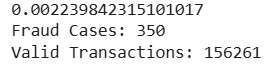

**Step 4: Exploring Transaction Amounts**

Let's compare the transaction amounts for fraudulent and normal transactions. This will help us understand if there are any significant differences in the monetary value of fraudulent transactions.

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

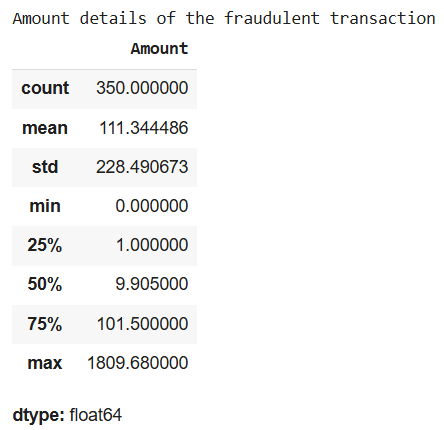

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

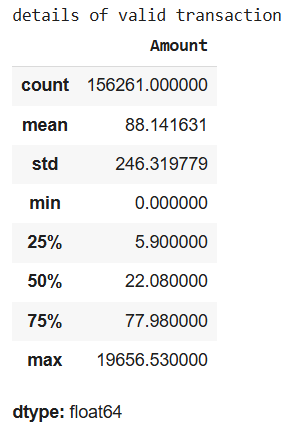

From the output we observe that fraudulent transactions tend to have higher average amounts which is important in fraud detection.

**Step 5: Plotting Correlation Matrix**

We can visualize the correlation between features using a heatmap using correlation matrix. This will give us an understanding of how the different features are correlated and which ones may be more relevant for prediction.

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

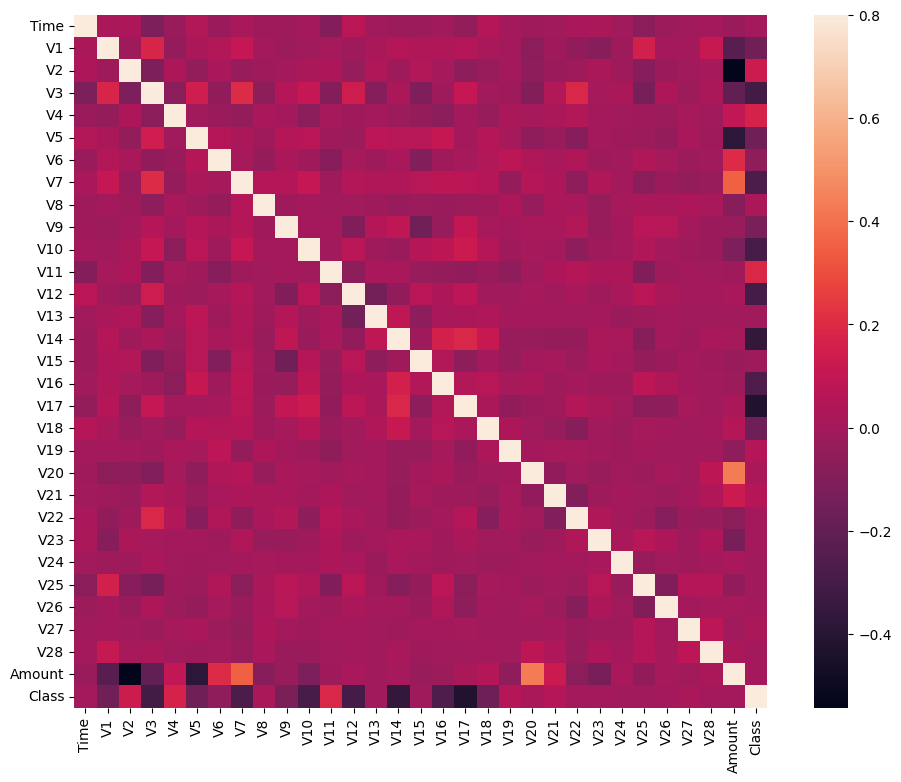

Most features do not correlate strongly with others but some features like V2 and V5 have a negative correlation with the Amount feature. This provides valuable insights into how the features are related to the transaction amounts.


**Step 6: Preparing Data**

Separate the input features (X) and target variable (Y) then split the data into training and testing sets.


*   X = data.drop(['Class'], axis = 1) removes the target column (Class) from the dataset to keep only the input features.
*   Y = data["Class"] selects the Class column as the target variable (fraud or not).
*   X.shape and Y.shape print the number of rows and columns in the feature set and the target set.
*   xData = X.values and yData = Y.values convert the Pandas DataFrame or Series to NumPy arrays for faster processing.
*   train_test_split(...) splits the data into training and testing sets into 80% for training, 20% for testing.
*   random_state=42 ensures reproducibility (same split every time you run it).


In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

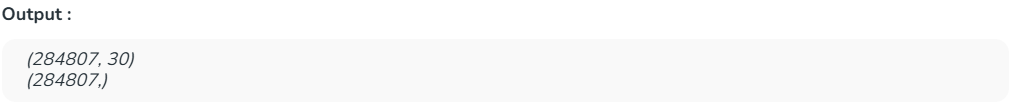

**Step 7: Building and Training the Model**

Train a Random Forest Classifier to predict fraudulent transactions.

1. from sklearn.ensemble import RandomForestClassifier: This imports the RandomForestClassifier from sklearn.ensemble, which is used to create a random forest model for classification tasks.
2. rfc = RandomForestClassifier(): Initializes a new instance of the RandomForestClassifier.
3. rfc.fit(xTrain, yTrain): Trains the RandomForestClassifier model on the training data (xTrain for features and yTrain for the target labels).
4. yPred = rfc.predict(xTest): Uses the trained model to predict the target labels for the test data (xTest), storing the results in yPred.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

**Step 8: Evaluating the Model**

After training the model we need to evaluate its performance using various metrics such as accuracy, precision, recall, F1-score and the Matthews correlation coefficient.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

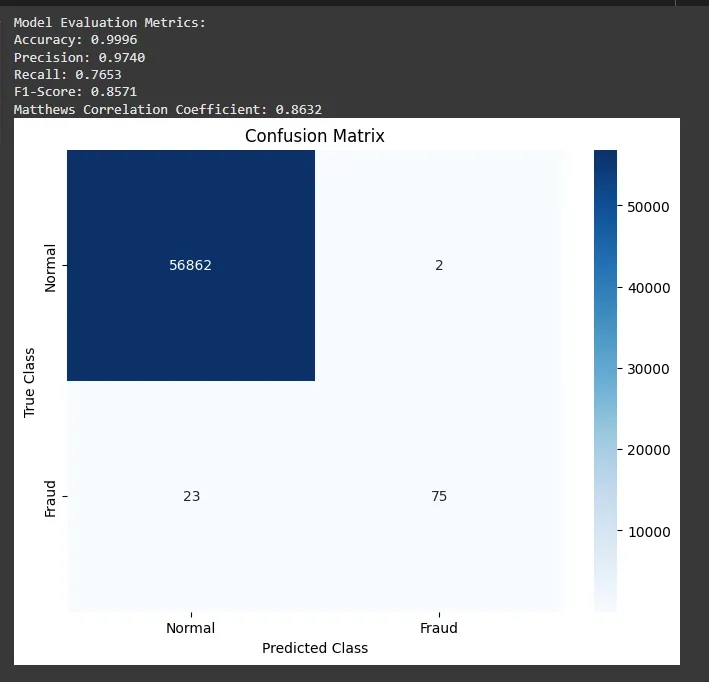

**Model Evaluation Metrics:**

The model accuracy is high due to class imbalance so we will have computed precision, recall and f1 score to get a more meaningful understanding. We observe:

1. Accuracy: 0.9996: Out of all predictions, 99.96% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.
2. Precision: 0.9873: When the model predicted "fraud", it was correct 98.73% of the time. High precision means very few false alarms (false positives).
Recall: 0.7959: Out of all actual fraud cases, the model detected 79.59%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).
3. F1-Score: 0.8814: A balance between precision and recall. 88.14% is strong and shows the model handles both catching fraud and avoiding false alarms well.
4. Matthews Correlation Coefficient (MCC): 0.8863: A more balanced score (from -1 to +1) even when classes are imbalanced. A value of 0.8863 is very good, it means the model is making strong, balanced predictions overall.


We can balance dataset by oversampling the minority class or by undersampling the majority class we can increase accuracy of our model.